In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
leads = pd.read_csv("Leads.csv")

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
leads.shape

(9240, 37)

In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
leads.duplicated().sum()

0

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
leads.drop(['Prospect ID', 'Lead Number'],1,inplace = True)

In [13]:
leads = leads.replace('Select',np.nan)

In [14]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [16]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
leads['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [18]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

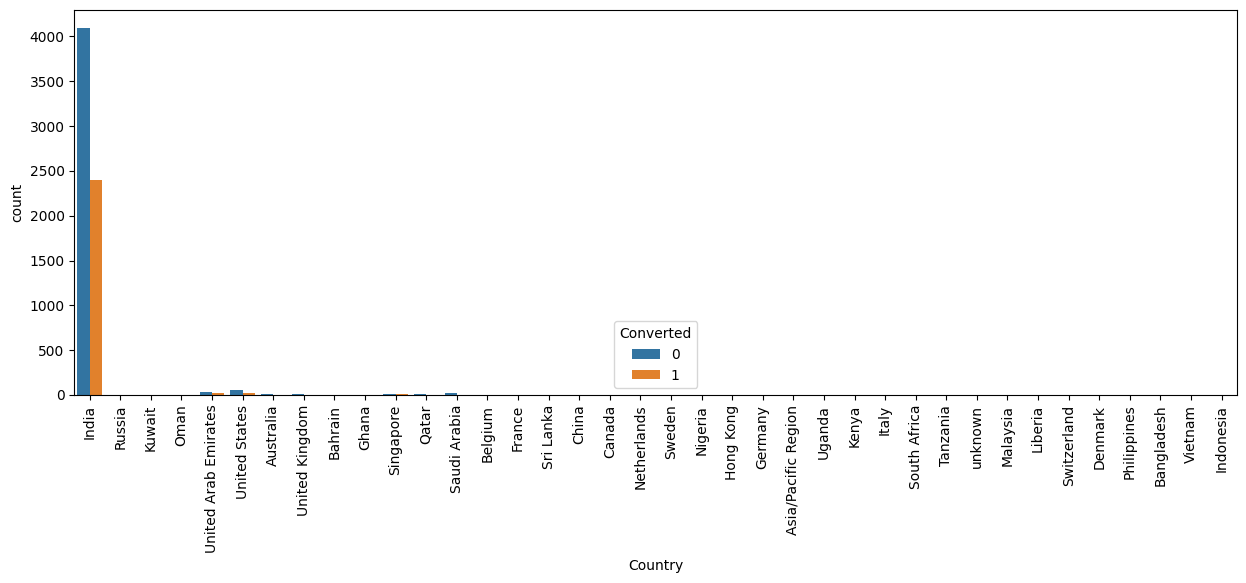

In [19]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [20]:
cols_to_drop=["Country"]

In [21]:
leads['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [22]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

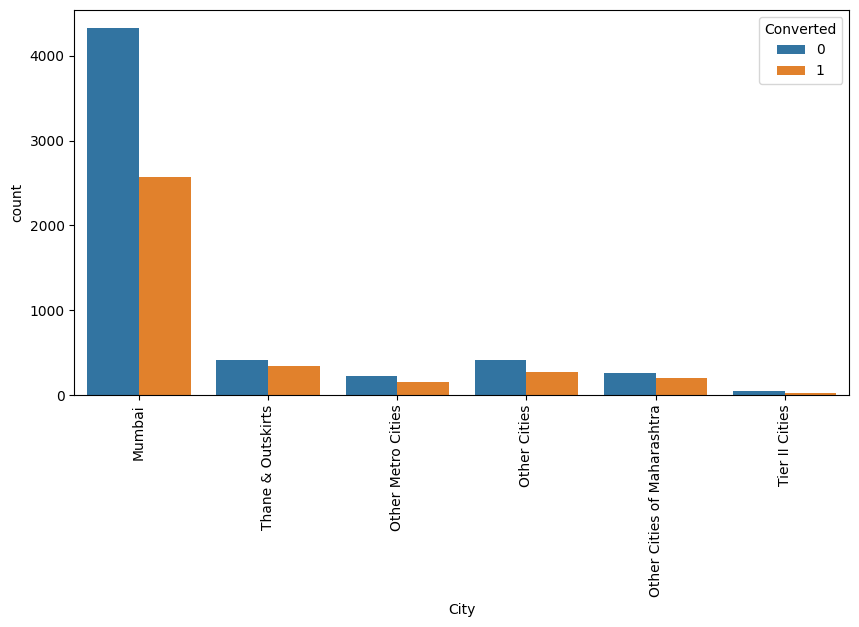

In [24]:
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

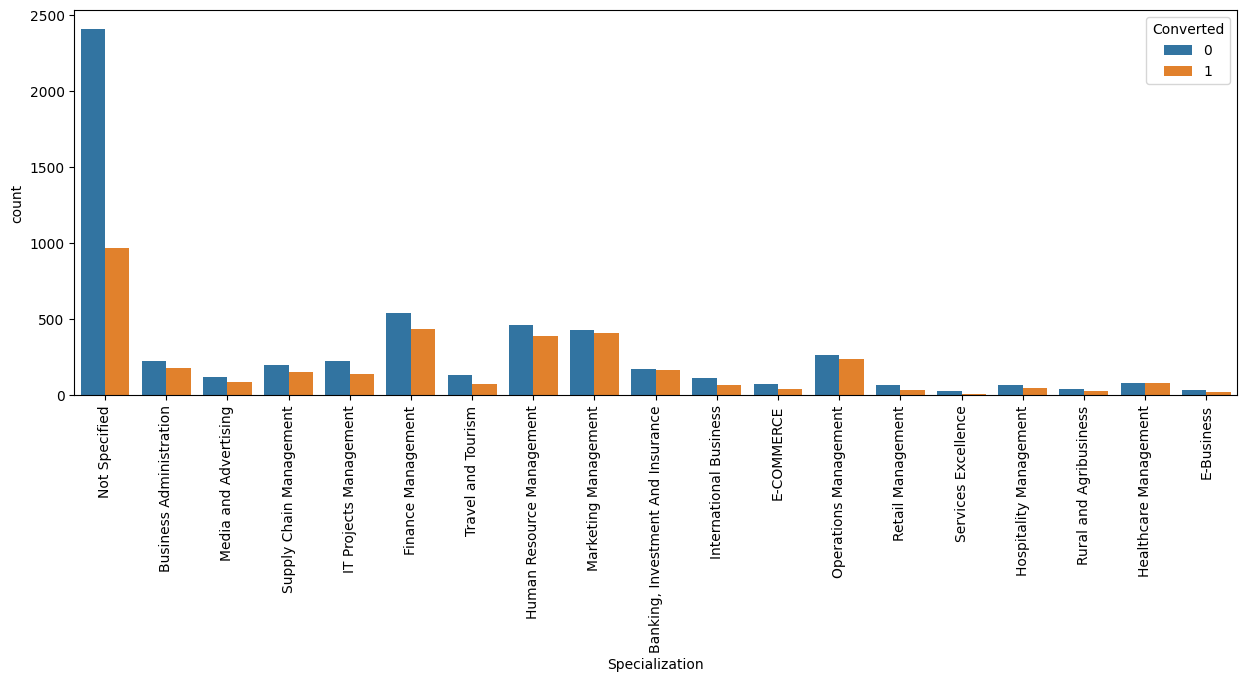

In [27]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

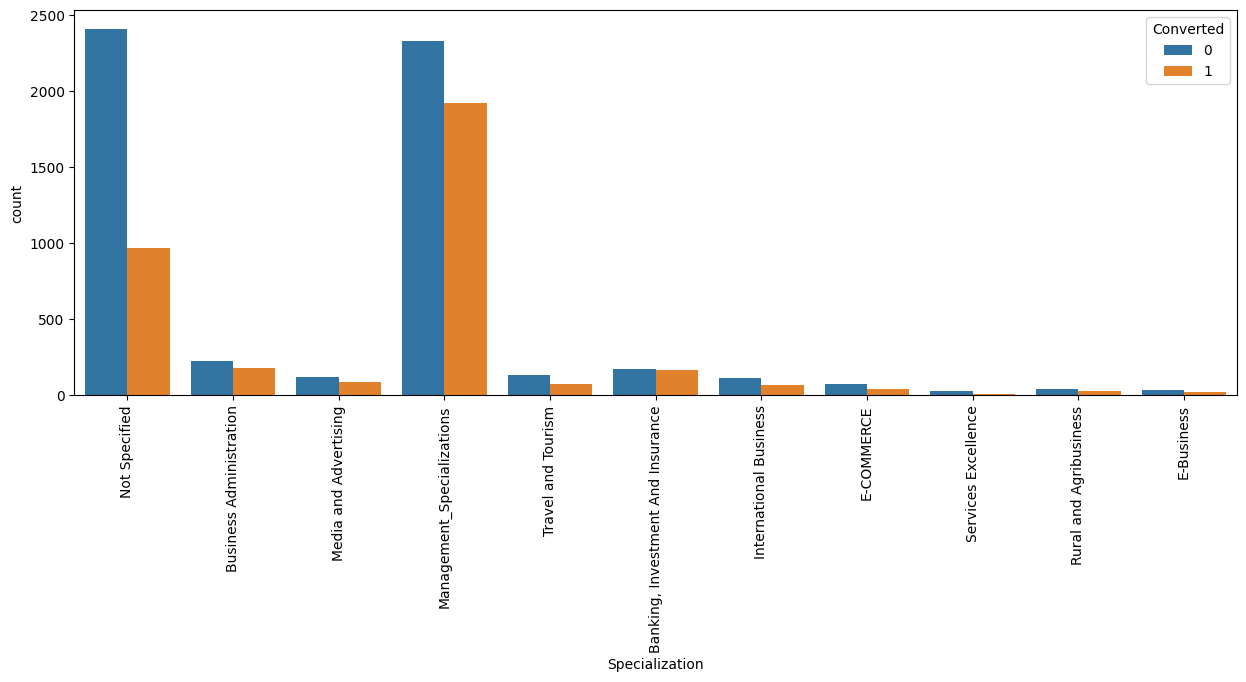

In [29]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [32]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

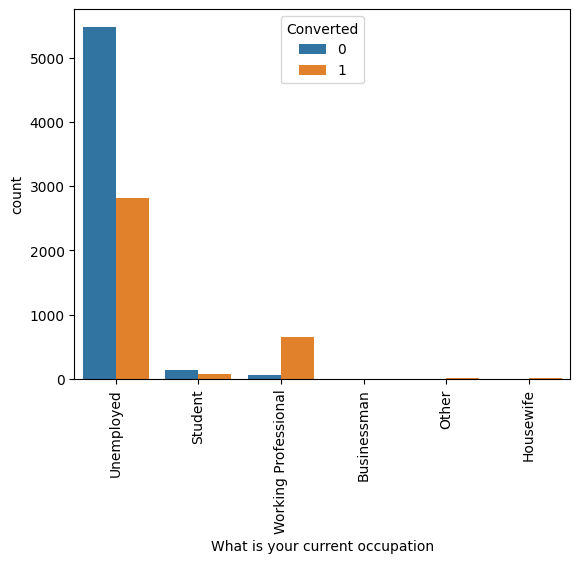

In [33]:
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

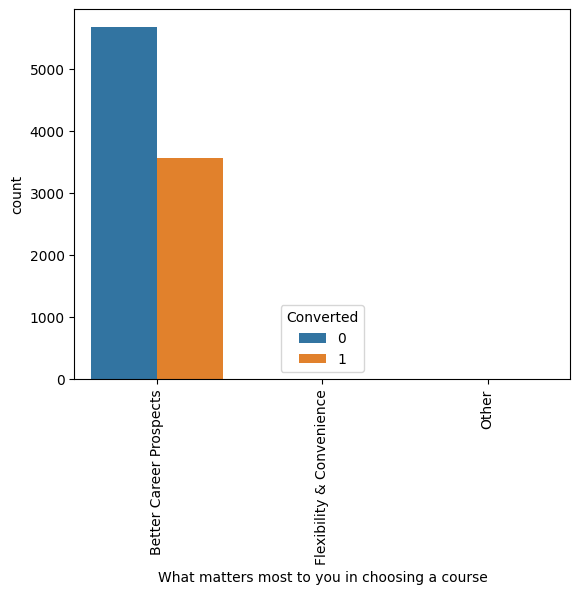

In [36]:
s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [39]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

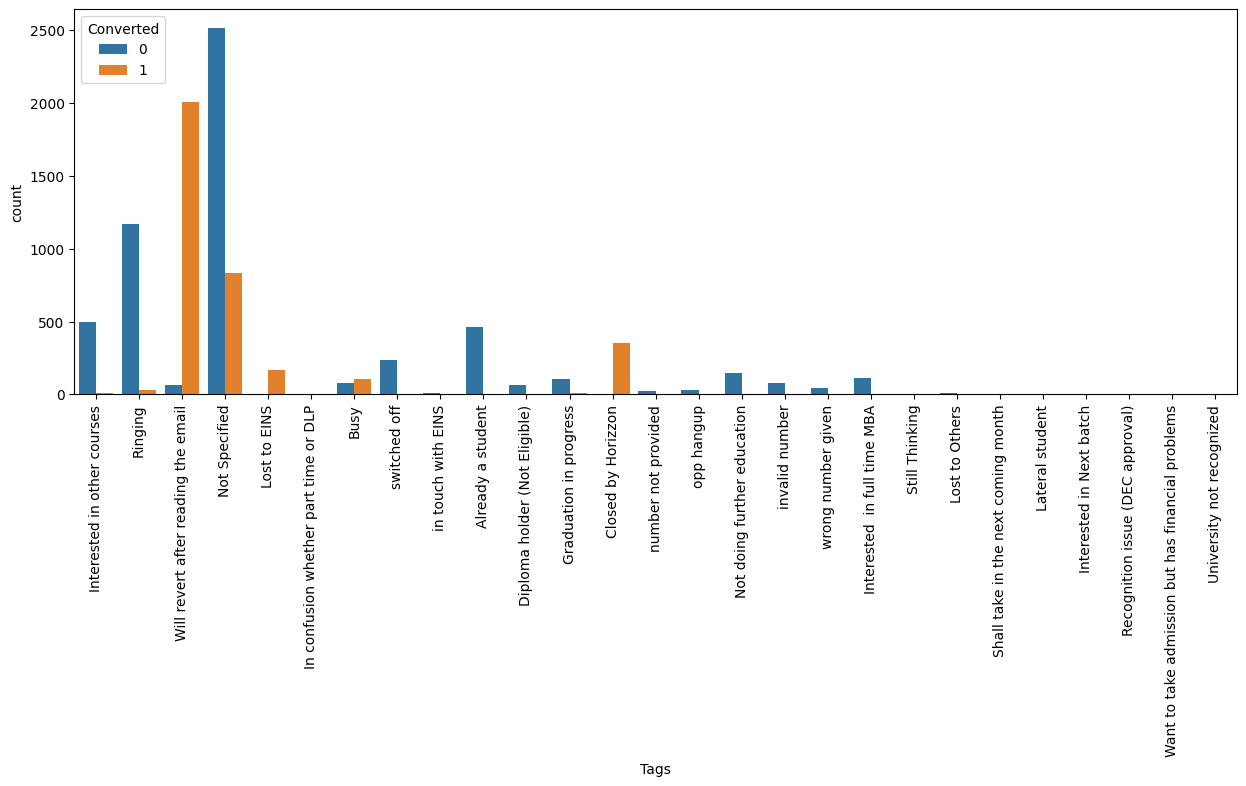

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [43]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [44]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

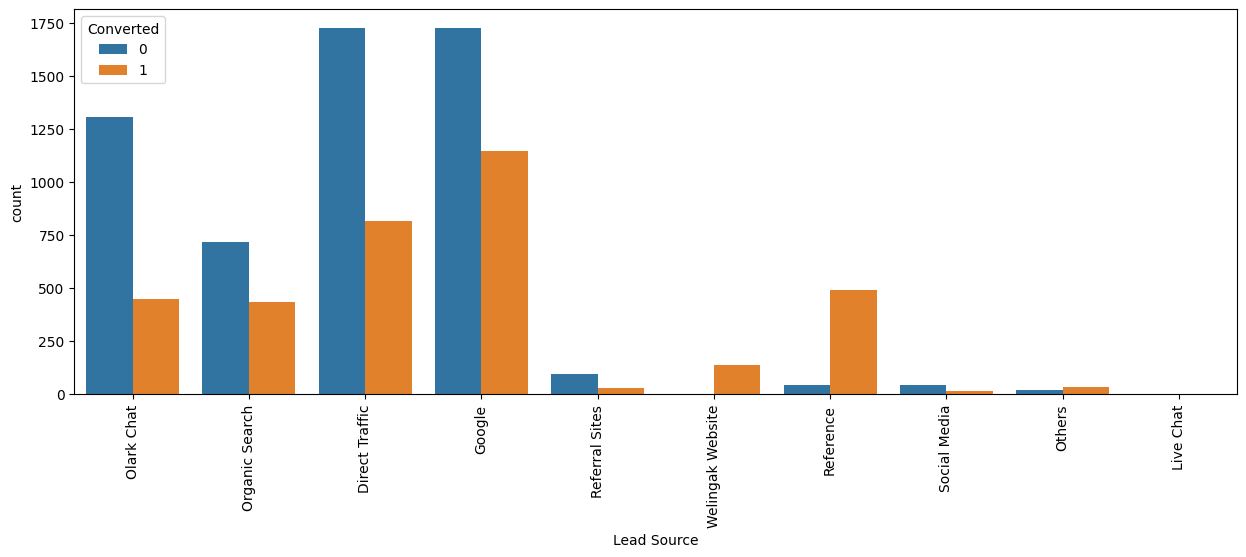

In [46]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [48]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [49]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [50]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [51]:
leads = leads.dropna()

In [52]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [53]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

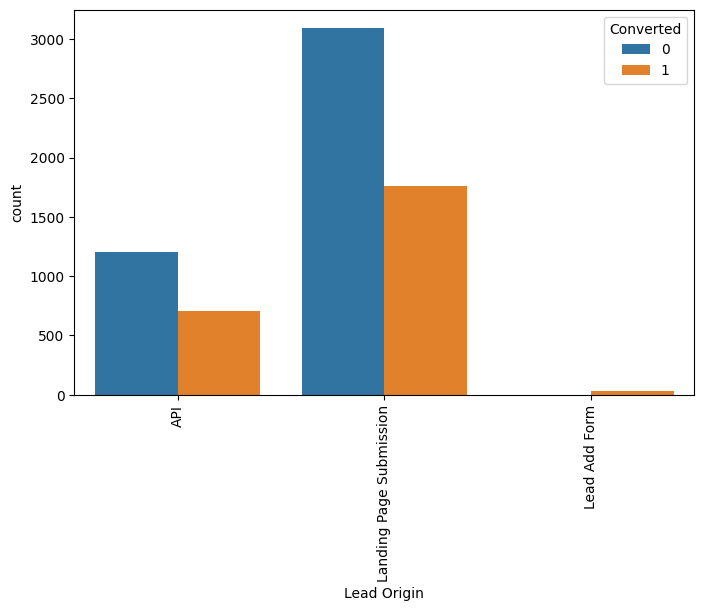

In [54]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

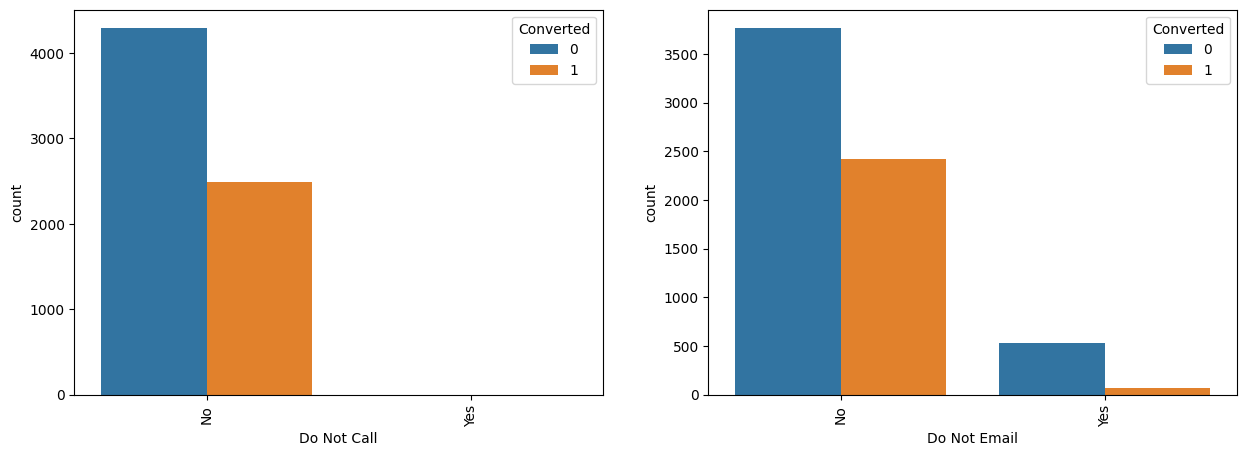

In [55]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [56]:
leads['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [57]:
leads['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

In [59]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Call']

In [60]:
leads.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [61]:
leads.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [62]:
leads['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [64]:
leads['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [65]:
leads['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [66]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
leads['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [71]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [72]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [73]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [74]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [75]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [76]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [77]:
leads['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [78]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

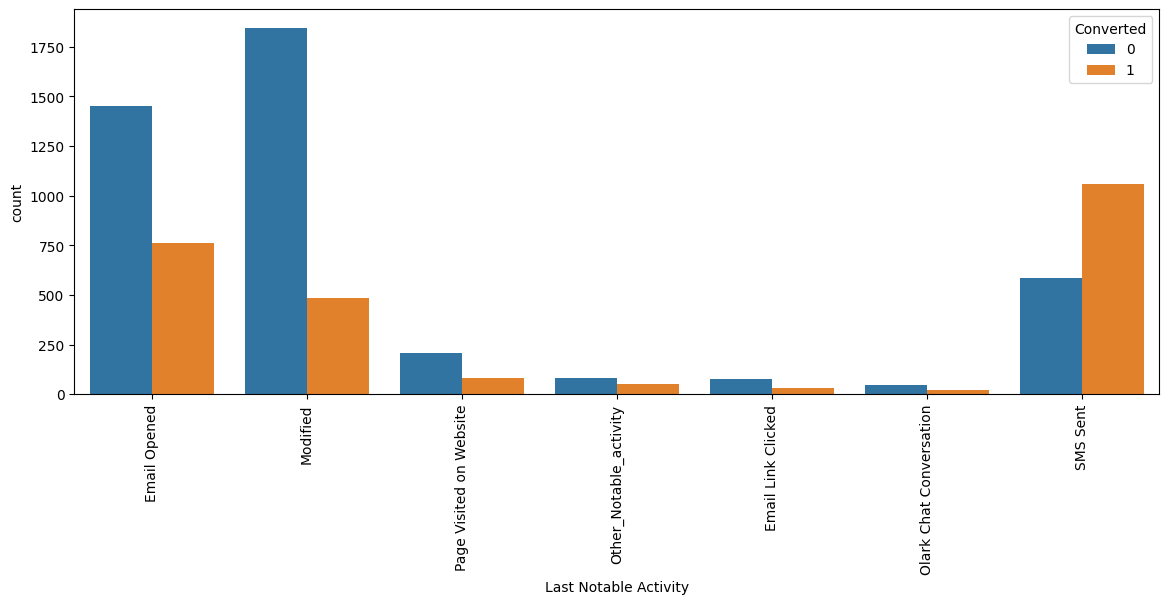

In [79]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [80]:
leads['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [81]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [82]:
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

In [83]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

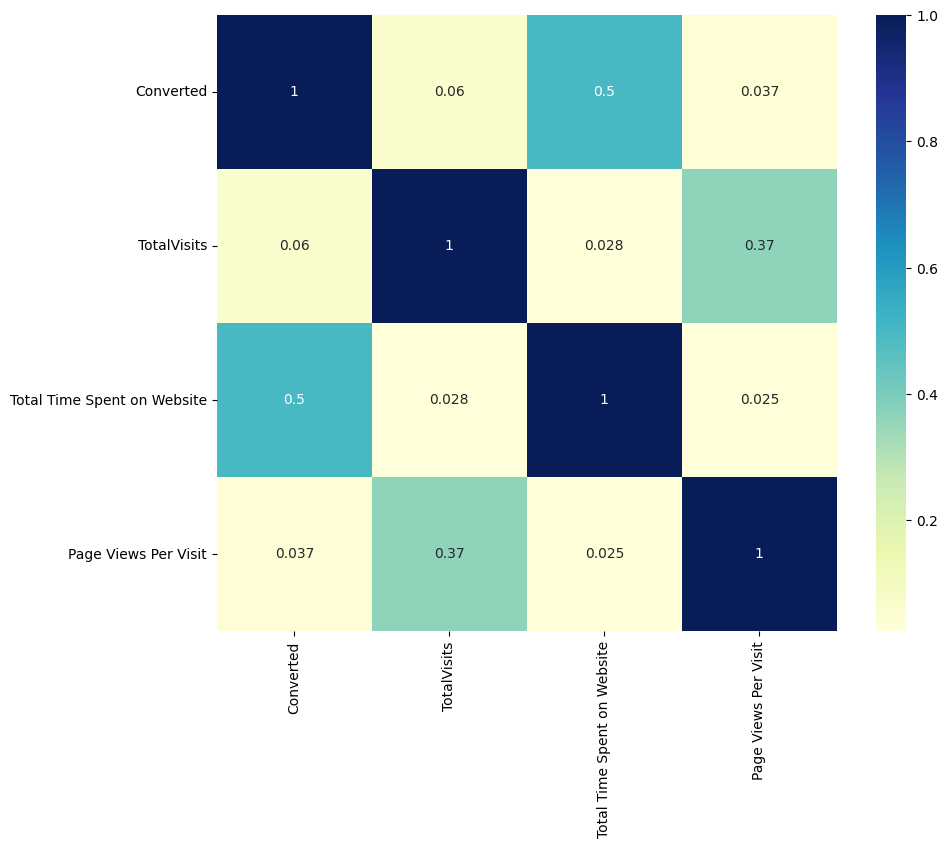

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

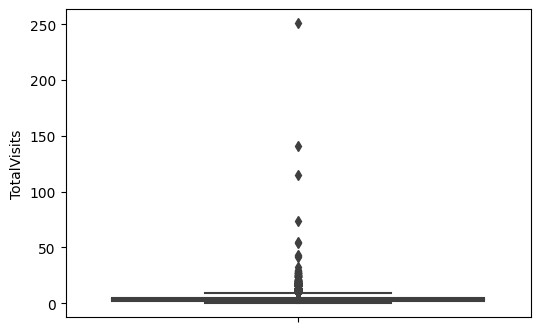

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [87]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

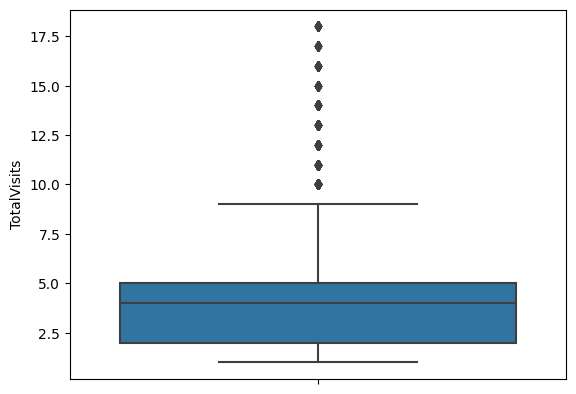

In [88]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [89]:
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

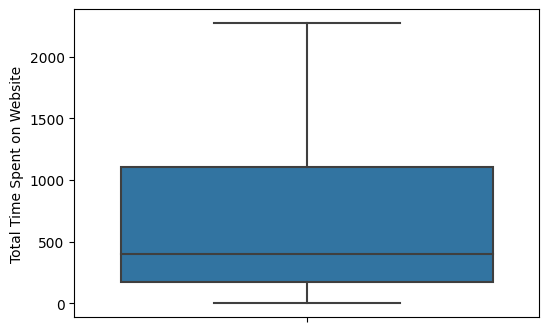

In [90]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [94]:
leads['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

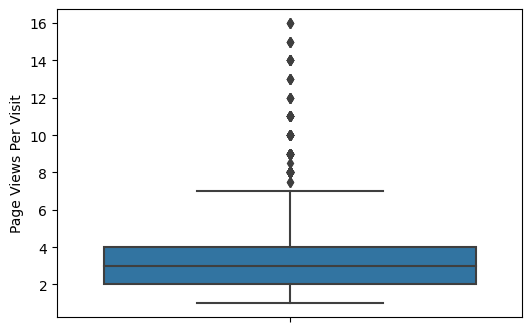

In [95]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

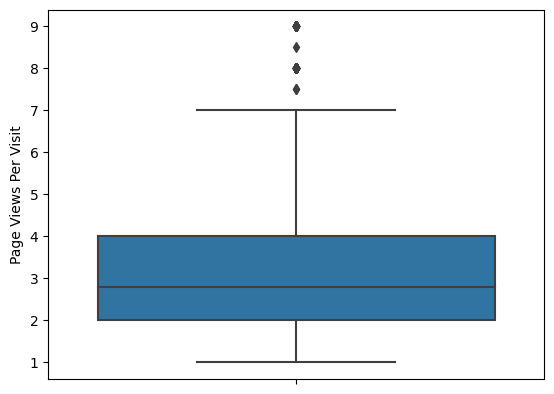

In [96]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

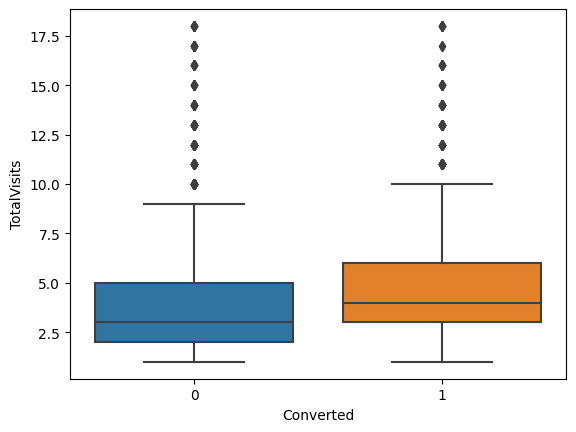

In [97]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

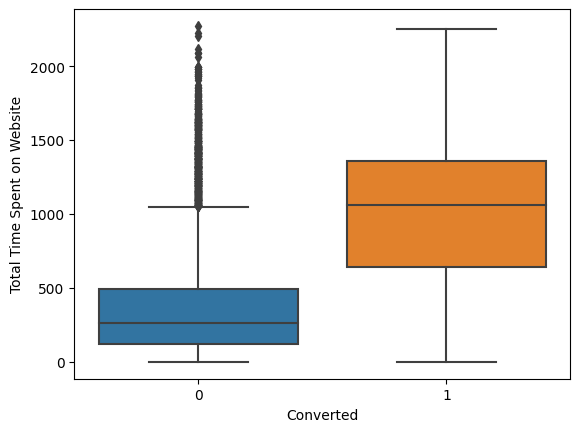

In [98]:
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

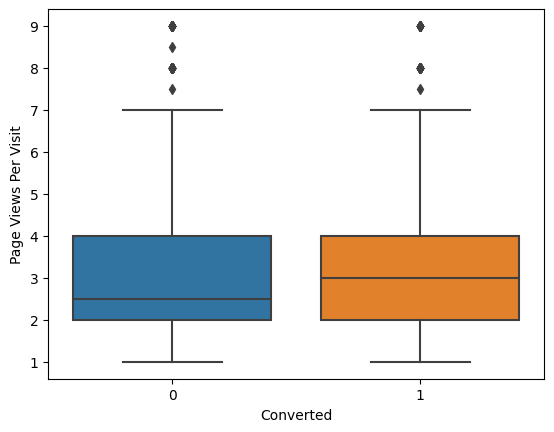

In [99]:
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [100]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [101]:
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [102]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [103]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [104]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [105]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [106]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [108]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [109]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [111]:
leads.drop(cat_cols,1,inplace = True)

In [112]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [118]:
import statsmodels.api as sm

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
rfe = rfe.fit(X_train, y_train)

In [120]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [121]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 15),
 ('What is your current occupation_Other', False, 20),
 ('What is your current occupation_Student', False, 5),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 28),
 ('City_Other Cities of Maharashtra', False, 23),
 ('City_Other Metro Cities', False, 16),
 ('City_Thane & Outskirts', False, 26),
 ('City_Tier II Cities', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', False, 27),
 ('Specialization_Management_Specializations

In [122]:
col = X_train.columns[rfe.support_]

In [123]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],

In [127]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4620
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -855.64
Date:                Sat, 26 Nov 2022   Deviance:                       1711.3
Time:                        21:08:20   Pearson chi2:                 6.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3578      0.531     -0.673      0.501      -1.399       0.684
Total Time Spent on Website                              1.1277      0.066     17.109      0.000       0.999       1.257
Lead Origin_Landing Page Submission                     -0.7147      0.143     -4.983      0.000      -0.996      -0.434
Lead Origin_Lead Add Form                               22.5031   4.44e+04      0.001      1.000   -8.69e+04    8.69e+04
What is your current occupation_Unemployed              -0.7273      0.517     -1.406      0.160      -1.741       0.286
What is your current occupation_Working Professional     0.7012      0.726      0.966      0.334      -0.722       2.124
City_Tier II Cities                                      0.7459      0.657      1.136      0.256      -0.541       2.033
Specialization_Business Administration                   0.4206      0.281      1.496      0.135      -0.130       0.972
Specialization_E-COMMERCE                                0.5721      0.552      1.037      0.300      -0.509       1.653
Specialization_Media and Advertising                     0.2597      0.423      0.614      0.539      -0.569       1.088
Specialization_Rural and Agribusiness                    0.5512      0.730      0.755      0.450      -0.880       1.983
Lead Source_Olark Chat                                  -0.3006      0.441     -0.682      0.495      -1.165       0.564
Lead Source_Social Media                                -2.4687      1.635     -1.510      0.131      -5.673       0.736
Lead Source_Welingak Website                             2.3468   1.05e+05   2.24e-05      1.000   -2.05e+05    2.05e+05
Last Activity_Converted to Lead                         -0.7007      0.379     -1.851      0.064      -1.443       0.041
Last Activity_Email Bounced                             -1.4583      0.564     -2.584      0.010      -2.565      -0.352
Last Activity_Page Visited on Website                   -0.7036      0.283     -2.484      0.013      -1.259      -0.148
Last Activity_SMS Sent                                   0.6975      0.280      2.495      0.013       0.150       1.245
Last Notable Activity_Modified                          -0.7608      0.199     -3.820      0.000      -1.151      -0.370
Last Notable Activity_Olark Chat Conversation           -0.8566      0.558     -1.536      0.124      -1.949       0.236
Last Notable Activity_SMS Sent                           1.2529      0.315      3.983      0.000       0.636       1.869
Tags_Busy                                                1.0724      0.250      4.285      0.000       0.582       1.563
Tags_Closed by Horizzon                                 27

In [129]:
col = col.drop('Lead Origin_Lead Add Form',1)

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4621
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.39
Date:                Sat, 26 Nov 2022   Deviance:                       1712.8
Time:                        21:08:44   Pearson chi2:                 6.53e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3491      0.531     -0.657      0.511      -1.390       0.692
Total Time Spent on Website                              1.1293      0.066     17.132      0.000       1.000       1.258
Lead Origin_Landing Page Submission                     -0.7207      0.143     -5.029      0.000      -1.002      -0.440
What is your current occupation_Unemployed              -0.7267      0.517     -1.405      0.160      -1.740       0.287
What is your current occupation_Working Professional     0.7048      0.726      0.971      0.331      -0.717       2.127
City_Tier II Cities                                      0.7474      0.657      1.138      0.255      -0.539       2.034
Specialization_Business Administration                   0.4202      0.281      1.494      0.135      -0.131       0.971
Specialization_E-COMMERCE                                0.5730      0.552      1.039      0.299      -0.508       1.654
Specialization_Media and Advertising                     0.2601      0.423      0.615      0.538      -0.568       1.089
Specialization_Rural and Agribusiness                    0.5505      0.730      0.754      0.451      -0.881       1.982
Lead Source_Olark Chat                                  -0.3073      0.441     -0.697      0.486      -1.171       0.557
Lead Source_Social Media                                -2.4692      1.636     -1.509      0.131      -5.677       0.738
Lead Source_Welingak Website                            24.8415   9.47e+04      0.000      1.000   -1.86e+05    1.86e+05
Last Activity_Converted to Lead                         -0.7011      0.378     -1.853      0.064      -1.443       0.041
Last Activity_Email Bounced                             -1.4600      0.564     -2.587      0.010      -2.566      -0.354
Last Activity_Page Visited on Website                   -0.7069      0.283     -2.496      0.013      -1.262      -0.152
Last Activity_SMS Sent                                   0.6978      0.280      2.496      0.013       0.150       1.246
Last Notable Activity_Modified                          -0.7660      0.199     -3.848      0.000      -1.156      -0.376
Last Notable Activity_Olark Chat Conversation           -0.8647      0.558     -1.551      0.121      -1.957       0.228
Last Notable Activity_SMS Sent                           1.2482      0.315      3.969      0.000       0.632       1.865
Tags_Busy                                                1.0716      0.250      4.282      0.000       0.581       1.562
Tags_Closed by Horizzon                                 27.2184   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Tags_Interested in other courses                        -2

In [131]:
col = col.drop('Tags_Closed by Horizzon',1)

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4622
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.00
Date:                Sat, 26 Nov 2022   Deviance:                       1974.0
Time:                        21:09:06   Pearson chi2:                 6.92e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5875
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2314      0.434      0.533      0.594      -0.620       1.083
Total Time Spent on Website                              1.1365      0.061     18.611      0.000       1.017       1.256
Lead Origin_Landing Page Submission                     -0.4746      0.131     -3.621      0.000      -0.731      -0.218
What is your current occupation_Unemployed              -1.1509      0.422     -2.729      0.006      -1.977      -0.324
What is your current occupation_Working Professional     1.5409      0.564      2.730      0.006       0.435       2.647
City_Tier II Cities                                      0.5643      0.599      0.943      0.346      -0.609       1.738
Specialization_Business Administration                   0.3598      0.261      1.378      0.168      -0.152       0.872
Specialization_E-COMMERCE                                0.6251      0.477      1.311      0.190      -0.309       1.559
Specialization_Media and Advertising                     0.2680      0.390      0.688      0.492      -0.496       1.032
Specialization_Rural and Agribusiness                    0.2008      0.708      0.284      0.777      -1.186       1.588
Lead Source_Olark Chat                                  -0.4364      0.430     -1.015      0.310      -1.279       0.406
Lead Source_Social Media                                -2.7376      1.609     -1.701      0.089      -5.891       0.416
Lead Source_Welingak Website                            21.3043    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
Last Activity_Converted to Lead                         -1.3814      0.354     -3.901      0.000      -2.076      -0.687
Last Activity_Email Bounced                             -1.8942      0.496     -3.819      0.000      -2.866      -0.922
Last Activity_Page Visited on Website                   -0.5394      0.227     -2.378      0.017      -0.984      -0.095
Last Activity_SMS Sent                                  -0.0133      0.250     -0.053      0.957      -0.503       0.476
Last Notable Activity_Modified                          -0.2359      0.162     -1.456      0.145      -0.553       0.082
Last Notable Activity_Olark Chat Conversation           -0.8340      0.513     -1.627      0.104      -1.839       0.171
Last Notable Activity_SMS Sent                           1.7571      0.288      6.092      0.000       1.192       2.322
Tags_Busy                                                0.7746      0.245      3.159      0.002       0.294       1.255
Tags_Interested in other courses                        -2.8074      0.432     -6.492      0.000      -3.655      -1.960
Tags_Lost to EINS                                        4

In [134]:
col = col.drop('Last Notable Activity_Modified',1)

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [136]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4623
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -988.07
Date:                Sat, 26 Nov 2022   Deviance:                       1976.1
Time:                        21:10:43   Pearson chi2:                 7.13e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1458      0.430      0.339      0.735      -0.698       0.989
Total Time Spent on Website                              1.1334      0.061     18.594      0.000       1.014       1.253
Lead Origin_Landing Page Submission                     -0.4711      0.131     -3.599      0.000      -0.728      -0.215
What is your current occupation_Unemployed              -1.1385      0.422     -2.700      0.007      -1.965      -0.312
What is your current occupation_Working Professional     1.5700      0.565      2.778      0.005       0.462       2.678
City_Tier II Cities                                      0.5512      0.602      0.916      0.360      -0.628       1.730
Specialization_Business Administration                   0.3632      0.261      1.390      0.164      -0.149       0.875
Specialization_E-COMMERCE                                0.6305      0.475      1.327      0.184      -0.301       1.562
Specialization_Media and Advertising                     0.2609      0.391      0.668      0.504      -0.505       1.026
Specialization_Rural and Agribusiness                    0.2057      0.707      0.291      0.771      -1.181       1.592
Lead Source_Olark Chat                                  -0.4335      0.430     -1.009      0.313      -1.275       0.408
Lead Source_Social Media                                -2.8240      1.640     -1.722      0.085      -6.038       0.390
Lead Source_Welingak Website                            21.3070    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
Last Activity_Converted to Lead                         -1.5448      0.336     -4.597      0.000      -2.203      -0.886
Last Activity_Email Bounced                             -1.9972      0.491     -4.070      0.000      -2.959      -1.035
Last Activity_Page Visited on Website                   -0.5806      0.225     -2.582      0.010      -1.021      -0.140
Last Activity_SMS Sent                                  -0.1794      0.222     -0.810      0.418      -0.614       0.255
Last Notable Activity_Olark Chat Conversation           -0.7592      0.510     -1.488      0.137      -1.759       0.241
Last Notable Activity_SMS Sent                           1.9909      0.240      8.299      0.000       1.521       2.461
Tags_Busy                                                0.7876      0.246      3.205      0.001       0.306       1.269
Tags_Interested in other courses                        -2.8782      0.431     -6.685      0.000      -3.722      -2.034
Tags_Lost to EINS                                        4.8224      0.630      7.653      0.000       3.587       6.057
Tags_Other_Tags                                         -2

In [137]:
col = col.drop('Tags_Busy',1)

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4624
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -993.20
Date:                Sat, 26 Nov 2022   Deviance:                       1986.4
Time:                        21:11:22   Pearson chi2:                 7.16e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5864
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1640      0.431      0.380      0.704      -0.682       1.010
Total Time Spent on Website                              1.1287      0.061     18.631      0.000       1.010       1.247
Lead Origin_Landing Page Submission                     -0.4341      0.130     -3.332      0.001      -0.689      -0.179
What is your current occupation_Unemployed              -1.1380      0.423     -2.692      0.007      -1.967      -0.309
What is your current occupation_Working Professional     1.5413      0.567      2.718      0.007       0.430       2.653
City_Tier II Cities                                      0.5090      0.603      0.844      0.399      -0.674       1.692
Specialization_Business Administration                   0.4151      0.257      1.618      0.106      -0.088       0.918
Specialization_E-COMMERCE                                0.5693      0.474      1.201      0.230      -0.360       1.498
Specialization_Media and Advertising                     0.2881      0.383      0.751      0.452      -0.463       1.040
Specialization_Rural and Agribusiness                    0.2905      0.680      0.427      0.669      -1.043       1.624
Lead Source_Olark Chat                                  -0.4140      0.430     -0.964      0.335      -1.256       0.428
Lead Source_Social Media                                -2.4726      1.774     -1.394      0.163      -5.949       1.004
Lead Source_Welingak Website                            21.2949   1.41e+04      0.002      0.999   -2.77e+04    2.77e+04
Last Activity_Converted to Lead                         -1.5508      0.335     -4.635      0.000      -2.207      -0.895
Last Activity_Email Bounced                             -2.0229      0.488     -4.147      0.000      -2.979      -1.067
Last Activity_Page Visited on Website                   -0.5607      0.224     -2.506      0.012      -0.999      -0.122
Last Activity_SMS Sent                                  -0.1347      0.219     -0.614      0.539      -0.565       0.295
Last Notable Activity_Olark Chat Conversation           -0.7720      0.509     -1.517      0.129      -1.770       0.226
Last Notable Activity_SMS Sent                           2.0200      0.238      8.475      0.000       1.553       2.487
Tags_Interested in other courses                        -2.9229      0.430     -6.793      0.000      -3.766      -2.080
Tags_Lost to EINS                                        4.7666      0.630      7.569      0.000       3.532       6.001
Tags_Other_Tags                                         -2.9208      0.242    -12.046      0.000      -3.396      -2.446
Tags_Ringing                                            -3

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Activity_SMS Sent,5.29
17,Last Notable Activity_SMS Sent,4.82
2,What is your current occupation_Unemployed,4.78
1,Lead Origin_Landing Page Submission,3.63
22,Tags_Will revert after reading the email,1.97
3,What is your current occupation_Working Profes...,1.58
21,Tags_Ringing,1.47
20,Tags_Other_Tags,1.44
18,Tags_Interested in other courses,1.17
14,Last Activity_Page Visited on Website,1.17


In [143]:
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

1979    0.927590
6249    0.495154
5557    0.096834
7865    0.003072
8491    0.006992
2573    0.171407
474     0.028609
4477    0.967681
1952    0.064318
1816    0.000561
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.27590321e-01, 4.95154451e-01, 9.68343237e-02, 3.07235478e-03,
       6.99161081e-03, 1.71407117e-01, 2.86089538e-02, 9.67680734e-01,
       6.43184536e-02, 5.60924459e-04])

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.927590,1979
1,0,0.495154,6249
2,0,0.096834,5557
3,0,0.003072,7865
4,0,0.006992,8491


In [146]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.927590,1979,1
1,0,0.495154,6249,0
2,0,0.096834,5557,0
3,0,0.003072,7865,0
4,0,0.006992,8491,0


In [147]:
from sklearn import metrics 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2816  145]
 [ 255 1432]]


In [148]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9139414802065404


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
TP/float(TP+FN)

0.8488441019561351

In [152]:
TN/float(TN+FP)

0.9510300574130361

In [153]:
print(FP/ float(TN+FP))

0.04896994258696386


In [154]:
print (TP / float(TP+FP))

0.9080532656943564


In [155]:
print (TN / float(TN+ FN))

0.9169651579290133
